## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [109]:
path = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [110]:
!wget $path

--2025-10-20 23:07:24--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: 'course_lead_scoring.csv.1'

     0K .......... .......... .......... .......... .......... 63% 6.55M 0s
    50K .......... .......... ........                        100%  312M=0.008s

2025-10-20 23:07:24 (10.2 MB/s) - 'course_lead_scoring.csv.1' saved [80876/80876]



In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
#from tqdm.auto import tqdm

In [112]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [113]:
#check for missing values
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [114]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [115]:
categ_cols = list(df.dtypes[df.dtypes == 'O'].index)
categ_cols

['lead_source', 'industry', 'employment_status', 'location']

In [116]:
num_cols = list(df.dtypes[df.dtypes!='O'][:-1].index)
num_cols

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [117]:
 #categorical features, replace them with 'NA'
for col in categ_cols:
    df[col] = df[col].fillna('NA')

In [118]:
#numerical features, replace with with 0.0
for col in num_cols:
    df[col] = df[col].fillna(0.0)

In [119]:
#check again the null values to see if they were replaced
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

<b>Split the data into 3 parts:</b> train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [120]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1 )



#since we use 20% of the df for test we have 80% to train the validation and we want to know how much is 20% of 80% and that is 20% / 80 % = 1/4 = 0.25 25%
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [121]:
#restart the index just for order
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)
df_val.reset_index(drop=True)

y_train = df_train.converted
y_test = df_test.converted
y_val = df_val.converted

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

In [122]:
for col in ['lead_score','number_of_courses_viewed','interaction_count','annual_income']:
    auc = roc_auc_score(df_train['converted'], df_train[col])
    print(f'column {col} auc = {auc if auc >= 0.5 else roc_auc_score(df_train['converted'], -df_train[col])}')

column lead_score auc = 0.6144993577250176
column number_of_courses_viewed auc = 0.7635680590007088
column interaction_count auc = 0.738270176293409
column annual_income auc = 0.5519578313253012


In [123]:
#removal of the target variable from the datasets to avoid future problems
del df_train['converted']
del df_test['converted']
del df_val['converted']

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92

In [124]:
# converts dictionaries of feature name/values into a numeric feature matrix for ML models
dv = DictVectorizer(sparse=False)

# converts the data in the dataset to a list of dictionarys with key-value pairs
train_dict = df_train[categ_cols+num_cols].to_dict(orient='records')

# the vectorizer learns all the features names that appear in the dictionarys list
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter= 1000)

# the model learns the relationship between features(X_train) and target (y_train)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [125]:
# now for the validation, converts the data in the dataset to a list of dictionarys with key-value pairs
val_dict = df_val[categ_cols+num_cols].to_dict(orient='records')

# for the valiation we don't fit the data since we don't want the model to learn from the validation dataset we want this data to be unseen
# we just transform to make sure that the validation data has the same structure as the training data
X_val = dv.transform(val_dict)

In [126]:
# Predicts the probability of the positive class, the output is a 1D array of the model's predicted probabilities for the positive class ([:,1])
y_pred = model.predict_proba(X_val)[:,1]

In [127]:
roc_auc_score(y_val,y_pred)

0.8171316268814112

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745

In [128]:
scores = []
# thresholds from 0.0 to 1.0 with step 0.01
thresholds = np.arange(0.0, 1.01,0.01)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive&actual_positive).sum()
    tn = (predict_negative&actual_negative).sum()

    fp = (predict_positive&actual_negative).sum()
    fn = (predict_negative&actual_positive).sum()

    scores.append((t,tp,tn,fp,fn))
    



In [129]:
# Creation of a dataframe to use for ploting the precision and recall

# columns for the dataframe
cols = ['t','tp','tn','fp','fn']
# creation of dataframe
df_scores = pd.DataFrame(scores,columns=cols)
df_scores.head()

,t,tp,tn,fp,fn
0,0.00,171,0,122,0
1,0.01,171,0,122,0
2,0.02,171,0,122,0
3,0.03,171,0,122,0
4,0.04,171,0,122,0


In [130]:
# precision is the number of true positives divided by the sum of true positives and false positives
# adding the column precision to the dataframe
df_scores['precision'] = df_scores.tp/(df_scores.tp + df_scores.fp)

# the recall is the fraction of correctly identified examples, is thre true positives divided by the sum of true positives and false negatives
# adding the column recall to the dataframe
df_scores['recall'] = df_scores.tp/(df_scores.tp + df_scores.fn)

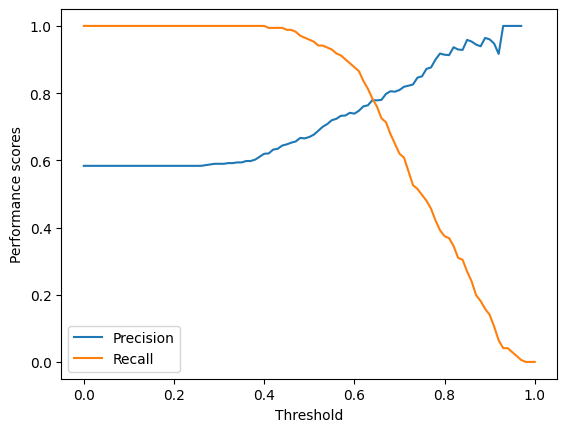

In [131]:
plt.plot(df_scores.t, df_scores['precision'], label = 'Precision')
plt.plot(df_scores.t, df_scores['recall'], label = 'Recall')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Performance scores')
plt.show()

In [132]:
# Find the index where precision and recall are closest
idx = np.argmin(np.abs(df_scores['precision'] - df_scores['recall']))

# Get the corresponding threshold and value
t_intersect = df_scores.t[idx]
val_intersect = df_scores['precision'][idx]

print(f"Intersection near threshold = {t_intersect:.4f}, score ≈ {val_intersect:.4f}")

Intersection near threshold = 0.6400, score ≈ 0.7791


1. `df_scores['precision'] - df_scores['recall']`

   * This computes a **Series** of per-row differences: `precision_i - recall_i` for each threshold `t_i`.
   * Result is a pandas Series with the same index as `df_scores`.

2. `np.abs(...)`

   * Takes the absolute value of the differences. So you get how far apart precision and recall are at each threshold, always non-negative.
   * If a row has `precision == recall`, its absolute difference will be `0`.

3. `np.argmin(...)`

   * Returns the **position (integer index)** of the smallest element in the array-like input.
   * Here it gives the **position of the threshold where the difference is minimal** — i.e., where the curves are closest (an intersection if difference is exactly 0).
   * Important note: `np.argmin` returns a **positional index (0-based)**. If you passed a pandas Series, NumPy treats it like an array of values, so `idx` is an integer position, not the DataFrame label.

4. `t_intersect = df_scores.t[idx]`

   * Uses the positional index to look up the threshold value at that position.
   * This assumes `df_scores.t` is indexable by integer position. If `df_scores.t` is a Series with a RangeIndex, this works fine; if the DataFrame uses a custom index, prefer `.iloc` (see edge-cases section).

5. `val_intersect = df_scores['precision'][idx]`

   * Grabs the precision value at the same position. Since we selected the position where precision ≈ recall, this `val_intersect` is effectively the common value.


In [133]:
import numpy as np

# Extract recall and precision values
x = df_scores['recall'].values
y = df_scores['precision'].values

# Difference between precision and recall
diff = y - x

intersection = None  # Store the intersection

# Loop through consecutive points
for i in range(len(diff) - 1):
    d0, d1 = diff[i], diff[i + 1]
    x0, x1 = x[i], x[i + 1]
    y0, y1 = y[i], y[i + 1]

    if d0 == 0:
        # Exact match at this point
        intersection = (x0, y0)
        break
    elif d0 * d1 < 0:
        # Sign change: interpolate to find intersection
        t = d0 / (d0 - d1)
        recall_intersect = x0 + t * (x1 - x0)
        precision_intersect = y0 + t * (y1 - y0)
        intersection = (recall_intersect, precision_intersect)
        break

# Output the intersection
if intersection is not None:
    print("Intersection (recall, precision):", intersection)
else:
    print("No intersection found.")


Intersection (recall, precision): (np.float64(0.778944356007083), np.float64(0.778944356007083))


In [134]:
df_scores[df_scores['recall'] >= 0.778944356007083].sort_values(by='recall', ascending=True).head(1)

,t,tp,tn,fp,fn,precision,recall
64,0.64,134,84,38,37,0.77907,0.783626


In [135]:
df_scores[df_scores['precision'] >= 0.778944356007083].sort_values(by='precision', ascending=True).head(1)

,t,tp,tn,fp,fn,precision,recall
64,0.64,134,84,38,37,0.77907,0.783626


### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [136]:
df_scores['precision'].sum()

np.float64(70.50993992557548)

In [137]:
df_scores['recall'].sum()

np.float64(75.12865497076024)

In [138]:
f1_scores_list = []

threshold = np.arange(0.0,1.01,0.01)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive&actual_positive).sum()
    tn = (predict_negative&actual_negative).sum()

    fp = (predict_positive&actual_negative).sum()
    fn = (predict_negative&actual_positive).sum()

    precision = tp/(tp+fp)
    recall =    tp/(tp+fn)

    f1_scores = 2*precision*recall/(precision+recall)

    f1_scores_list.append((t,precision,recall,f1_scores))


C:\Users\guilh\AppData\Local\Temp\ipykernel_26268\3015843279.py:18: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp)


In [139]:
import numpy as np

f1_scores_list = []

thresholds = np.arange(0.0, 1.01, 0.01)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    # Handle zero denominators safely
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1_scores = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

    f1_scores_list.append((t, precision, recall, f1_scores))


In [140]:
# Find the tuple with the maximum F1 score
best_threshold, best_precision, best_recall, best_f1 = max(f1_scores_list, key=lambda x: x[3])

print(f"Best Threshold: {best_threshold}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")


Best Threshold: 0.5700000000000001
Precision: 0.7323943661971831
Recall: 0.9122807017543859
F1 Score: 0.8124999999999999


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36

In [141]:
def train(df_train, y_train):
    dicts = df_train[categ_cols + num_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv,model

In [142]:
def predict(df, dv , model):
    dicts = df[categ_cols + num_cols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [143]:
#importing the KFold class from Scikit-Learn
from sklearn.model_selection import KFold

In [144]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [145]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print("AUC scores:", scores)
print("Mean AUC:", np.mean(scores))


AUC scores: [0.8060745924216483, 0.8713738368910783, 0.7754320118852139, 0.8018368617683685, 0.8558272713202291]
Mean AUC: 0.8221089148573075


In [146]:
import statistics as stats
stats.stdev(scores)


0.040033576560906475

In [147]:
std = np.std(scores)
print(std)

0.03580711942905165


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [148]:
def train(df_train, y_train, c):
    dicts = df_train[categ_cols + num_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X_train, y_train)

    return dv,model

In [149]:
def predict(df, dv , model):
    dicts = df[categ_cols + num_cols].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [150]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [151]:
C_values = [0.000001, 0.001, 1]

for c in C_values:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, c)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f"C={c}")
    print("AUC scores:", scores)
    print("Mean AUC:", np.mean(scores))
    print("Std AUC:", np.std(scores, ddof=1))
    print("-" * 40)


C=1e-06
AUC scores: [0.5572098563239782, 0.5191961842208147, 0.5894909688013137, 0.5582191780821917, 0.5769230769230769]
Mean AUC: 0.560207852870275
Std AUC: 0.026607326856918134
----------------------------------------
C=0.001
AUC scores: [0.8608650338718081, 0.8967081085307685, 0.822816482915005, 0.8539850560398504, 0.9000154774802662]
Mean AUC: 0.8668780317675395
Std AUC: 0.03213926275662365
----------------------------------------
C=1
AUC scores: [0.8060745924216483, 0.8713738368910783, 0.7754320118852139, 0.8018368617683685, 0.8558272713202291]
Mean AUC: 0.8221089148573075
Std AUC: 0.04003357656090647
----------------------------------------
